In [1]:
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])


In [3]:
model = keras.Sequential()
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

In [4]:
model.build(input_shape=(None, 3))
model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[ 0.00713509, -0.16381341, -0.01405931, -0.26146236,  0.11174041,
         -0.03111339, -0.17791331,  0.2677756 , -0.18305096, -0.03527623,
         -0.03071943, -0.14995831,  0.24853557,  0.0136576 ,  0.19781518,
          0.19813281,  0.09371579, -0.00643888, -0.14118151,  0.27311915,
          0.10060179,  0.10015902,  0.03740397,  0.24814487,  0.14739901,
          0.22529757,  0.21455479,  0.10437346, -0.19375557,  0.19094521,
         -0.24477783, -0.01165932, -0.17661035,  0.29694968,  0.12827197,
         -0.06852065, -0.21307574,  0.28087896,  0.24783766, -0.29382747,
          0.20580047, -0.12219781,  0.26404387, -0.2541158 , -0.13047425,
          0.24746668,  0.25342453, -0.07463911, -0.21202302, -0.18722528,
          0.20283723,  0.29373938, -0.14336582,  0.1410495 ,  0.297252  ,
          0.18098274, -0.07845163,  0.01666585, -0.04179284, -0.21623814,
         -0.29745835, -0.15615791, -0.21164

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                256       
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [6]:
model = keras.Sequential(name="my_example_model")
model.add(layers.Dense(64, activation="relu", name="my_first_layer"))
model.add(layers.Dense(10, activation="softmax", name="my_last_layer"))
model.build((None,3))
model.summary()

Model: "my_example_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_first_layer (Dense)      (None, 64)                256       
                                                                 
 my_last_layer (Dense)       (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [7]:
model=keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation="relu"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.add(layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [9]:
inputs = keras.Input(shape=(3,), name="my_input")
inputs.shape

TensorShape([None, 3])

In [10]:
inputs.dtype

tf.float32

In [11]:
features=layers.Dense(64, activation="relu")(inputs)

In [12]:
features.shape

TensorShape([None, 64])

In [13]:
outputs = layers.Dense(10, activation="softmax")(features)

In [14]:
outputs.shape

TensorShape([None, 10])

In [15]:
model = keras.Model(inputs = inputs, outputs = outputs)

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_6 (Dense)             (None, 64)                256       
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [17]:
vocabulary_size=10000
num_tags=100
num_departments=4

title = keras.Input(shape=(vocabulary_size,), name="title")
text_body=keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features=layers.Dense(64, activation="relu")(layers.Concatenate()([title, text_body, tags]))

In [18]:
priority=layers.Dense(1, activation="sigmoid", name="priority")(features)

In [19]:
department = layers.Dense(num_departments, activation="softmax", name="department")(features)

In [20]:
model=keras.Model(inputs=[title, text_body, tags],
                  outputs=[priority, department])

In [21]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 title (InputLayer)             [(None, 10000)]      0           []                               
                                                                                                  
 text_body (InputLayer)         [(None, 10000)]      0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 100)]        0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 20100)        0           ['title[0][0]',                  
                                                                  'text_body[0][0]',        

In [22]:
import numpy as np

num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)

model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])

40/40 [==============================] - 0s 5ms/step - loss: 35.3955 - priority_loss: 0.3325 - department_loss: 35.0630 - priority_mean_absolute_error: 0.4967 - department_accuracy: 0.5562


[35.39549255371094,
 0.3325038552284241,
 35.06299591064453,
 0.4967368543148041,
 0.5562499761581421]

In [23]:
priority_preds, department_preds = model.predict(
[title_data, text_body_data, tags_data])

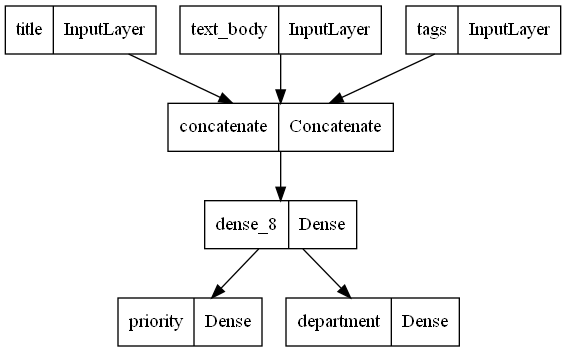

In [24]:
keras.utils.plot_model(model, "ticket_classifier.png")

In [25]:
!pip install pydot


In [26]:
!pip install graphviz

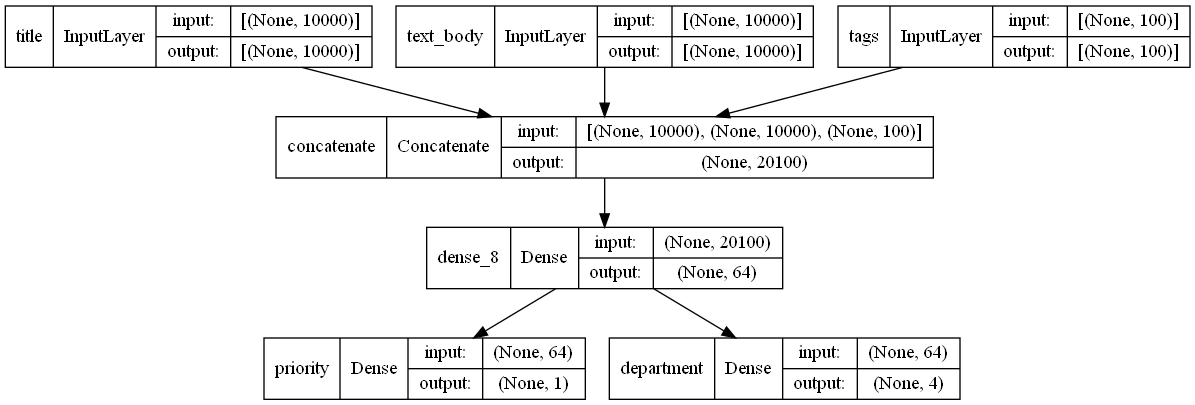

In [28]:
keras.utils.plot_model(model, "ticket_classifier.png", show_shapes=True)

In [30]:
model.layers

In [35]:
model.layers[5].input

<KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'dense_8')>